In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preparation 

In [11]:
df = pd.read_csv('./Heart Attack Data Set.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
#select the columns that we want to use (age and thalach)
df = df[['age', 'thalach']]
df.head()

,age,thalach
0,63,150
1,37,187
2,41,172
3,56,178
4,57,163


In [13]:
#sorting the data by age
df = df.sort_values(by='age')
df.head()

,age,thalach
72,29,202
58,34,174
125,34,192
65,35,182
227,35,130


In [14]:
#cleaning datta from inconsistent data types
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')
df = df.dropna()


In [15]:
#cleaning duplicates from the data
num_duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Removed {num_duplicates} duplicates.")
df.head()

Removed 12 duplicates.


,age,thalach
72,29,202
58,34,174
125,34,192
65,35,182
227,35,130


In [19]:
#fix multivalued data
df = df.groupby('age').mean().reset_index()
df.head()

,age,thalach
0,34,183.00
1,35,160.50
2,37,178.50
3,38,177.50
4,39,163.25


# 2. Data Preprocessing

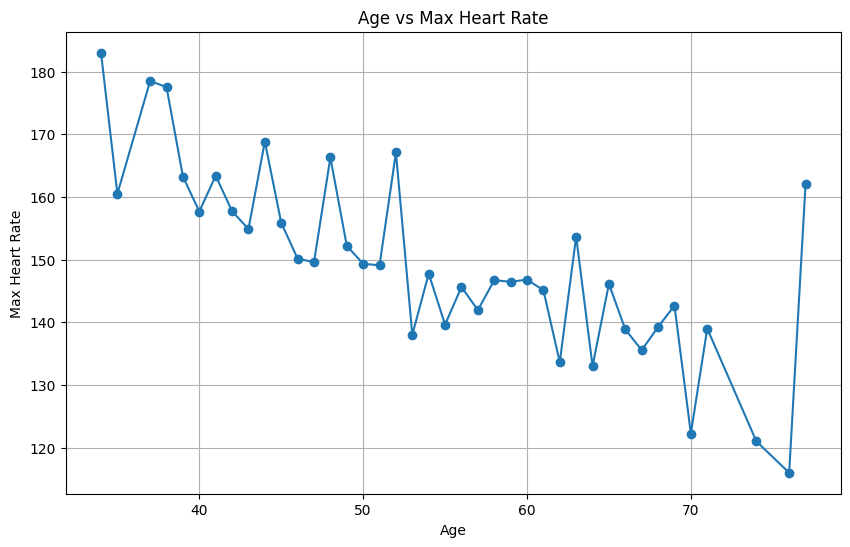

In [21]:
#Plotting the data with line plot
plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['thalach'], marker='o')
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.grid()

In [22]:
#removing outliers with IQR method
Q1 = df['thalach'].quantile(0.25)
Q3 = df['thalach'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['thalach'] >= Q1 - 1.5*IQR) & (df['thalach'] <= Q3 + 1.5*IQR)]
df.head()

,age,thalach
0,34,183.00
1,35,160.50
2,37,178.50
3,38,177.50
4,39,163.25


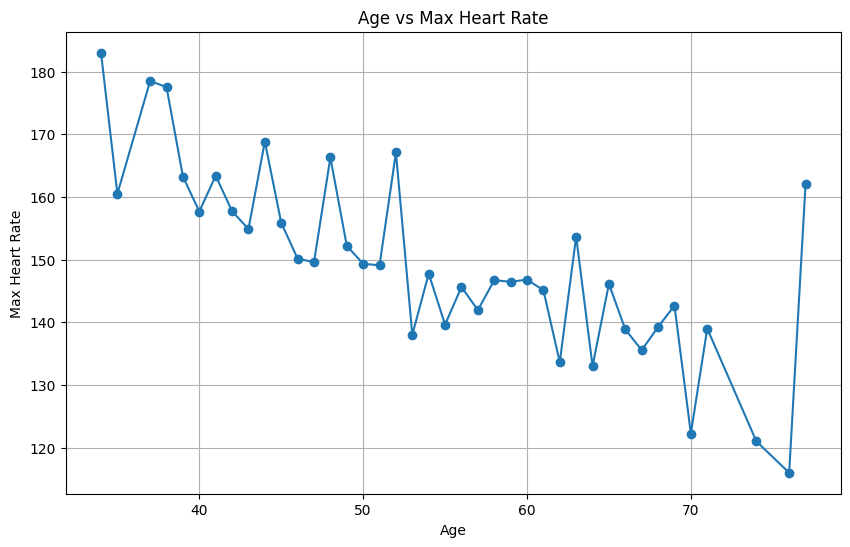

In [ ]:
#plotting the data with line plot after removing outliers
plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['thalach'], marker='o')
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.grid()

'''
from display the data is not linear, so we can use polynomial regression to fit the data
'''

# 3. Export Data

In [ ]:
#export the cleaned data
df.to_csv('cleaned_heart.csv', index=False)
df.to_excel('manualisasi.xlsx', index=False) #gawe manualisasi
print('Clean_Heart_Dataset.csv')

Clean_Heart_Dataset.csv
